# Praktikum 5

Jeremia Daud Halim - 2072021

Nomor 1

In [23]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv("drug200.csv")

In [25]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

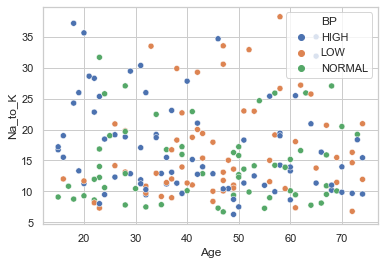

In [26]:
import seaborn as sns

sns.scatterplot(data=data, x='Age', y='Na_to_K', hue='BP')

Text(0.5, 1.0, 'Na_to_K')

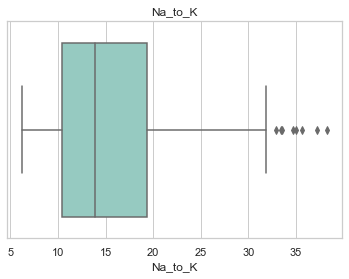

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
sns.boxplot(x='Na_to_K', data=data, palette='Set3')
plt.title('Na_to_K')

Nomor 2

Drop Categorical

In [28]:
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]
data.drop(cols_with_missing, axis=1, inplace=True)
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [29]:
drop_data = data.select_dtypes(exclude=['object'])
drop_data

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
...,...,...
195,56,11.567
196,16,12.006
197,52,9.894
198,23,14.020


Ordinal Encoding

In [30]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Sex', 'BP', 'Cholesterol', 'Drug']


In [31]:
from sklearn.preprocessing import OrdinalEncoder

label_data = data.copy()

ordinal_encoder = OrdinalEncoder()
label_data[object_cols] = ordinal_encoder.fit_transform(data[object_cols])
label_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,0.0
1,47,1.0,1.0,0.0,13.093,3.0
2,47,1.0,1.0,0.0,10.114,3.0
3,28,0.0,2.0,0.0,7.798,4.0
4,61,0.0,1.0,0.0,18.043,0.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,3.0
196,16,1.0,1.0,0.0,12.006,3.0
197,52,1.0,2.0,0.0,9.894,4.0
198,23,1.0,2.0,1.0,14.020,4.0


One-Hot Encoding

In [32]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[object_cols]))

OH_cols.index = data.index

num_data = data.drop(object_cols, axis=1)

OH_data = pd.concat([num_data, OH_cols], axis=1)
OH_data

,Age,Na_to_K,0,1,2,3,4,5,6,7,8,9,10,11
0,23,25.355,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,47,13.093,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,47,10.114,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28,7.798,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,61,18.043,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
196,16,12.006,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
197,52,9.894,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
198,23,14.020,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Nomor 3

In [89]:
from sklearn.model_selection import train_test_split

#untuk melakukan split data X dan Y
X = data[['Age', 'Na_to_K']]
Y = label_data['Drug']
X_train_drop, X_valid_drop, y_train_drop, y_valid_drop = train_test_split(drop_data, Y, train_size=0.8 , test_size=0.2, random_state=0)

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor()
model.fit(X_train_drop, y_train_drop)
preds = model.predict(X_valid_drop)
print("Drop Categorical")
print(mean_absolute_error(y_valid_drop, preds))

Drop Categorical
0.6325000000000001


In [91]:
X_train, X_valid, y_train, y_valid = train_test_split(label_data, Y, train_size=0.8, test_size=0.2, random_state=0)
model = RandomForestRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_valid)
print("Ordinal Encoder")
print(mean_absolute_error(y_valid, preds))

Ordinal Encoder
0.0002499999999999947


In [107]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)
accuracy = regressor.score(X_train,y_train)
print(accuracy)

0.4406216314622172


In [124]:
from sklearn.model_selection import train_test_split

#untuk melakukan split data X dan Y
X = data[['Age', 'Na_to_K']]
Y = label_data['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=45)

In [125]:
error_rates =[]
import numpy as np

In [126]:
from sklearn.linear_model import SGDClassifier

sgdModel = SGDClassifier(random_state=45)
sgdModel.fit(X_train, y_train)

SGDClassifier(random_state=45)

In [127]:
y_predict = sgdModel.predict(X_test)
y_predict

array([2., 4., 4., 4., 0., 4., 4., 4., 4., 4., 0., 4., 0., 0., 4., 0., 4.,
       4., 0., 4., 0., 0., 4., 0., 4., 4., 0., 0., 0., 4., 4., 0., 0., 0.,
       4., 4., 4., 0., 4., 0.])

In [128]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.6

Nomor 4

In [130]:
from sklearn.metrics import precision_score, recall_score, classification_report

precision_score(y_test, y_predict, average='micro')

0.6

In [140]:
recall_score(y_test, y_predict, average='micro')

0.6

In [150]:
matrix = classification_report(y_test, y_predict)
print("Classification Report : \n", matrix)

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.88      0.75      0.81        20
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         3
         4.0       0.41      0.82      0.55        11

    accuracy                           0.60        40
   macro avg       0.26      0.31      0.27        40
weighted avg       0.55      0.60      0.56        40



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
print(mean_absolute_error(y_valid, preds))

0.0002499999999999947
